# fastMRI
Python 3.6+, Tensorflow 2.0.0-dev20190601

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os, glob
import h5py # for loading .h5 files
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
plt.style.use('seaborn') # pretty matplotlib plots
plt.rcParams["axes.grid"] = False # don't show grid lines on plots by default
plt.rcParams['figure.figsize'] = (12, 16) # increase size of subplots

In [4]:
import cs230_project_utilities as utils

In [5]:
# Sync data:
# aws s3 sync s3://cs230-automap/data/fastmri/raw/singlecoil_val data/fastmri/raw/singlecoil_dev # (val -> dev) 
# aws s3 sync s3://cs230-automap/data/fastmri/raw/singlecoil_test data/fastmri/raw/singlecoil_test
# aws s3 sync s3://cs230-automap/data/fastmri/raw/singlecoil_train data/fastmri/raw/singlecoil_train

In [6]:
# Prepare local directories

raw_dev_locations = '/home/ubuntu/cs230/data/fastmri/raw/singlecoil_dev/*.h5'
raw_test_locations = '/home/ubuntu/cs230/data/fastmri/raw/singlecoil_test/*.h5'
raw_train_locations = '/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/*.h5'

dev_tfrecord_directory = '/home/ubuntu/cs230/data/fastmri/tfrecords/singlecoil_dev'
test_tfrecord_directory = '/home/ubuntu/cs230/data/fastmri/tfrecords/singlecoil_test'
train_tfrecord_directory = '/home/ubuntu/cs230/data/fastmri/tfrecords/singlecoil_train'

!mkdir -p $dev_tfrecord_directory
!mkdir -p $test_tfrecord_directory
!mkdir -p $train_tfrecord_directory

In [36]:
# Run conversion

utils.fastmri.convert_fastmri_dataset_to_tfrecord_files(raw_dev_locations,
                                                        dev_tfrecord_directory,
                                                        coils='single',
                                                        keep_original_reconstruction=True,
                                                        perform_subsampling=False,
                                                        perform_normalization=True)

Converting file 0 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_dev/file1000277.h5' to TFRecords...
Converting file 1 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_dev/file1000628.h5' to TFRecords...
Converting file 2 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_dev/file1001144.h5' to TFRecords...
Converting file 3 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_dev/file1000631.h5' to TFRecords...
Converting file 4 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_dev/file1000942.h5' to TFRecords...
Converting file 5 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_dev/file1000899.h5' to TFRecords...
Converting file 6 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_dev/file1002252.h5' to TFRecords...
Converting file 7 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_dev/file1000126.h5' to TFRecords...
Converting file 8 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_dev/file1001997.h5' to TFRecords...
Converting file 9 at b'/home/ubuntu/cs230/data

Converting file 77 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_dev/file1001995.h5' to TFRecords...
Converting file 78 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_dev/file1001834.h5' to TFRecords...
Converting file 79 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_dev/file1001440.h5' to TFRecords...
Converting file 80 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_dev/file1002007.h5' to TFRecords...
Converting file 81 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_dev/file1000107.h5' to TFRecords...
Converting file 82 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_dev/file1001585.h5' to TFRecords...
Converting file 83 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_dev/file1001689.h5' to TFRecords...
Converting file 84 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_dev/file1000926.h5' to TFRecords...
Converting file 85 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_dev/file1000328.h5' to TFRecords...
Converting file 86 at b'/home/ubuntu/

Converting file 154 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_dev/file1001893.h5' to TFRecords...
Converting file 155 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_dev/file1001959.h5' to TFRecords...
Converting file 156 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_dev/file1000052.h5' to TFRecords...
Converting file 157 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_dev/file1000000.h5' to TFRecords...
Converting file 158 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_dev/file1000817.h5' to TFRecords...
Converting file 159 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_dev/file1002382.h5' to TFRecords...
Converting file 160 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_dev/file1001506.h5' to TFRecords...
Converting file 161 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_dev/file1000702.h5' to TFRecords...
Converting file 162 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_dev/file1000229.h5' to TFRecords...
Converting file 163 at b'/ho

In [21]:
utils.fastmri.convert_fastmri_dataset_to_tfrecord_files(raw_test_locations,
                                                        test_tfrecord_directory,
                                                        coils='single',
                                                        keep_original_reconstruction=False,
                                                        perform_subsampling=False,
                                                        perform_normalization=True)

Converting file 0 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_test/file1002428.h5' to TFRecords...
(26.12379+49.573956j)
(57.8447+185.748j)
(159.66191+402.44763j)
(436.01474+623.15533j)
(830.5349+956.4605j)
(1299.2269+1127.6559j)
(1797.6052+1219.4235j)
(1863.9386+1121.4395j)
(2213.2083+1215.0217j)
(2497.4937+1085.5842j)
(3392.7344+1029.418j)
(4078.3892+864.59064j)
(4094.1646+454.66202j)
(4445.702-135.465j)
(5013.481-697.8864j)
(4947.5513-990.00104j)
(4873.9785-1302.2905j)
(5121.6226-1681.3807j)
(5537.073-2087.526j)
(5221.578-2314.8098j)
(5116.8076-2458.9163j)
(5353.26-2880.1016j)
(5421.2676-3134.9915j)
(4300.2666-2970.1436j)
(3229.418-2343.9233j)
(3136.1936-2360.4521j)
(3307.9875-2725.212j)
(3302.9792-2905.9795j)
(3209.8213-2775.9475j)
(3314.937-2834.6436j)
(3031.8738-2557.764j)
(3038.4834-2381.2852j)
(2757.007-1964.3367j)
(2809.923-1888.5134j)
(2922.9849-1906.9055j)
(2787.7336-1550.4382j)
Converting file 1 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_test/file1001846.h5

KeyboardInterrupt: 

In [38]:
utils.fastmri.convert_fastmri_dataset_to_tfrecord_files(raw_train_locations,
                                                        train_tfrecord_directory,
                                                        coils='single',
                                                        keep_original_reconstruction=False,
                                                        perform_subsampling=False,
                                                        perform_normalization=True)

Converting file 0 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1002378.h5' to TFRecords...
Converting file 1 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1000143.h5' to TFRecords...
Converting file 2 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1000347.h5' to TFRecords...
Converting file 3 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1000874.h5' to TFRecords...
Converting file 4 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1002171.h5' to TFRecords...
Converting file 5 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1000205.h5' to TFRecords...
Converting file 6 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1000349.h5' to TFRecords...
Converting file 7 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1001437.h5' to TFRecords...
Converting file 8 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1001832.h5' to TFRecords...
Converting file 9 at b'/home

Converting file 76 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1000425.h5' to TFRecords...
Converting file 77 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1000601.h5' to TFRecords...
Converting file 78 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1000012.h5' to TFRecords...
Converting file 79 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1000563.h5' to TFRecords...
Converting file 80 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1002163.h5' to TFRecords...
Converting file 81 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1000188.h5' to TFRecords...
Converting file 82 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1001975.h5' to TFRecords...
Converting file 83 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1002379.h5' to TFRecords...
Converting file 84 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1000919.h5' to TFRecords...
Converting file 85 

Converting file 151 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1002388.h5' to TFRecords...
Converting file 152 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1001741.h5' to TFRecords...
Converting file 153 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1002211.h5' to TFRecords...
Converting file 154 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1002208.h5' to TFRecords...
Converting file 155 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1001642.h5' to TFRecords...
Converting file 156 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1002471.h5' to TFRecords...
Converting file 157 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1000617.h5' to TFRecords...
Converting file 158 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1001730.h5' to TFRecords...
Converting file 159 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1001513.h5' to TFRecords...
Converting

Converting file 226 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1000311.h5' to TFRecords...
Converting file 227 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1001277.h5' to TFRecords...
Converting file 228 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1001864.h5' to TFRecords...
Converting file 229 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1001071.h5' to TFRecords...
Converting file 230 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1000326.h5' to TFRecords...
Converting file 231 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1002049.h5' to TFRecords...
Converting file 232 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1002363.h5' to TFRecords...
Converting file 233 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1002087.h5' to TFRecords...
Converting file 234 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1002107.h5' to TFRecords...
Converting

Converting file 301 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1000824.h5' to TFRecords...
Converting file 302 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1001906.h5' to TFRecords...
Converting file 303 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1000045.h5' to TFRecords...
Converting file 304 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1001403.h5' to TFRecords...
Converting file 305 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1000125.h5' to TFRecords...
Converting file 306 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1000208.h5' to TFRecords...
Converting file 307 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1002499.h5' to TFRecords...
Converting file 308 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1002440.h5' to TFRecords...
Converting file 309 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1001306.h5' to TFRecords...
Converting

Converting file 376 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1001475.h5' to TFRecords...
Converting file 377 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1002567.h5' to TFRecords...
Converting file 378 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1000088.h5' to TFRecords...
Converting file 379 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1001783.h5' to TFRecords...
Converting file 380 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1001861.h5' to TFRecords...
Converting file 381 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1001526.h5' to TFRecords...
Converting file 382 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1000559.h5' to TFRecords...
Converting file 383 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1001023.h5' to TFRecords...
Converting file 384 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1002000.h5' to TFRecords...
Converting

Converting file 451 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1001888.h5' to TFRecords...
Converting file 452 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1001950.h5' to TFRecords...
Converting file 453 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1001235.h5' to TFRecords...
Converting file 454 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1001422.h5' to TFRecords...
Converting file 455 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1000734.h5' to TFRecords...
Converting file 456 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1001062.h5' to TFRecords...
Converting file 457 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1001623.h5' to TFRecords...
Converting file 458 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1000997.h5' to TFRecords...
Converting file 459 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1001022.h5' to TFRecords...
Converting

Converting file 648 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1000458.h5' to TFRecords...
Converting file 649 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1000971.h5' to TFRecords...
Converting file 650 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1001373.h5' to TFRecords...
Converting file 651 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1001479.h5' to TFRecords...
Converting file 652 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1002544.h5' to TFRecords...
Converting file 653 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1000785.h5' to TFRecords...
Converting file 654 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1000967.h5' to TFRecords...
Converting file 655 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1000829.h5' to TFRecords...
Converting file 656 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1001550.h5' to TFRecords...
Converting

Converting file 723 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1000736.h5' to TFRecords...
Converting file 724 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1002545.h5' to TFRecords...
Converting file 725 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1000225.h5' to TFRecords...
Converting file 726 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1001369.h5' to TFRecords...
Converting file 727 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1000075.h5' to TFRecords...
Converting file 728 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1002399.h5' to TFRecords...
Converting file 729 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1000287.h5' to TFRecords...
Converting file 730 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1002093.h5' to TFRecords...
Converting file 731 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1001320.h5' to TFRecords...
Converting

Converting file 798 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1002161.h5' to TFRecords...
Converting file 799 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1001963.h5' to TFRecords...
Converting file 800 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1000161.h5' to TFRecords...
Converting file 801 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1000231.h5' to TFRecords...
Converting file 802 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1000830.h5' to TFRecords...
Converting file 803 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1002154.h5' to TFRecords...
Converting file 804 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1001590.h5' to TFRecords...
Converting file 805 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1002146.h5' to TFRecords...
Converting file 806 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1001956.h5' to TFRecords...
Converting

Converting file 873 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1000602.h5' to TFRecords...
Converting file 874 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1002130.h5' to TFRecords...
Converting file 875 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1000324.h5' to TFRecords...
Converting file 876 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1001969.h5' to TFRecords...
Converting file 877 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1001615.h5' to TFRecords...
Converting file 878 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1000131.h5' to TFRecords...
Converting file 879 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1001261.h5' to TFRecords...
Converting file 880 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1000180.h5' to TFRecords...
Converting file 881 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1001872.h5' to TFRecords...
Converting

Converting file 948 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1001379.h5' to TFRecords...
Converting file 949 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1000633.h5' to TFRecords...
Converting file 950 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1000876.h5' to TFRecords...
Converting file 951 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1002273.h5' to TFRecords...
Converting file 952 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1002343.h5' to TFRecords...
Converting file 953 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1001602.h5' to TFRecords...
Converting file 954 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1001147.h5' to TFRecords...
Converting file 955 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1001854.h5' to TFRecords...
Converting file 956 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1000384.h5' to TFRecords...
Converting

In [11]:
# Sync TFRecords to s3
# aws s3 sync /home/ubuntu/cs230/data/fastmri/tfrecords/singlecoil_dev s3://cs230-automap/data/fastmri/tfrecords/singlecoil_dev
# aws s3 sync /home/ubuntu/cs230/data/fastmri/tfrecords/singlecoil_test s3://cs230-automap/data/fastmri/tfrecords/singlecoil_test
# aws s3 sync /home/ubuntu/cs230/data/fastmri/tfrecords/singlecoil_train s3://cs230-automap/data/fastmri/tfrecords/singlecoil_train

# Inspect dev data

In [21]:
# Load data

data_locations = os.path.join(dev_tfrecord_directory, 'shard-0.tfrecord')
dataset = utils.fastmri.load_dataset(data_locations,
                                     batch_size=8,
                                     shuffle_buffer_size=40,
                                     load_original_reconstruction=False,
                                     include_all_parsed_features=False,
                                     ignore_errors=True,
                                     perform_data_augmentation=False)

# Get first batch
batch = next(iter(dataset))
x, y = batch
x, y = x[0].numpy().squeeze(), y[0].numpy().squeeze()


# For visualization, combine 2 channels of complex tensor into single channel
x = utils.fastmri._combine_two_channels_of_complex_tensor(x).numpy()

x.shape, y.shape

Loading dataset... Shuffle items? True. Shuffle buffer: 40


((128, 128), (128, 128))

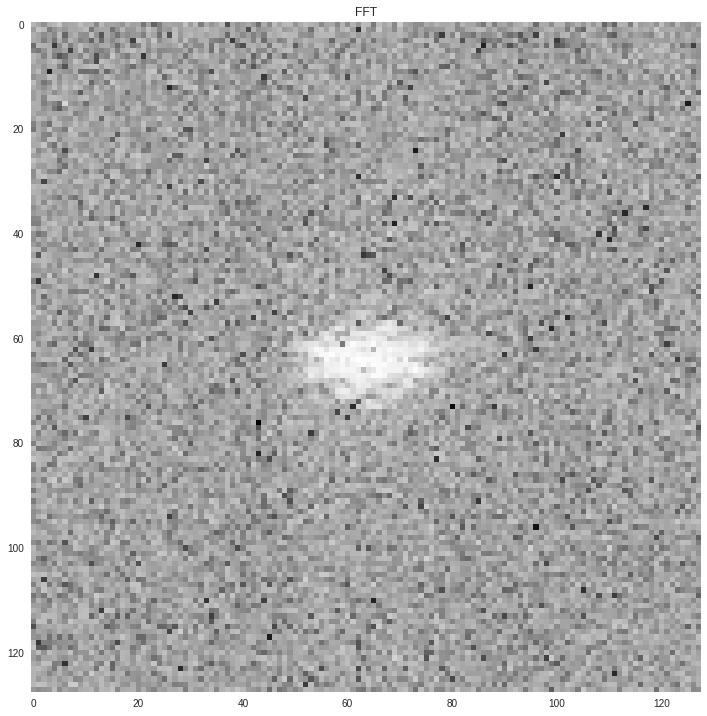

In [22]:
plt.title('FFT')
utils.plot.imshowfft(x)

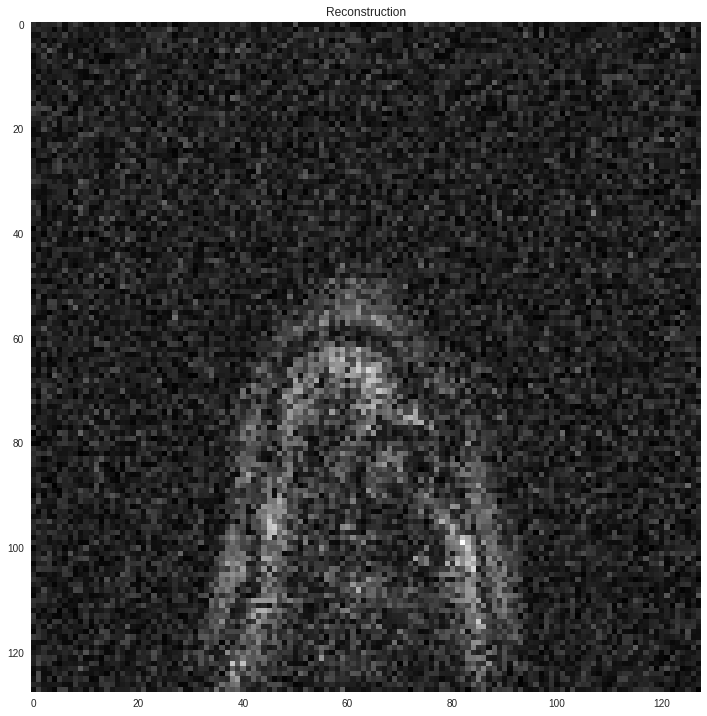

In [23]:
plt.title('Reconstruction')
utils.plot.imshowgray(y)

# Inspect test data

In [16]:
# Load data

data_locations = os.path.join(test_tfrecord_directory, 'shard-0.tfrecord')
dataset = utils.fastmri.load_dataset(data_locations,
                                     batch_size=8,
                                     shuffle_buffer_size=40,
                                     load_original_reconstruction=False,
                                     include_all_parsed_features=False,
                                     ignore_errors=True,
                                     perform_data_augmentation=False)

# Get first batch
batch = next(iter(dataset))
x, y = batch
x, y = x[0].numpy().squeeze(), y[0].numpy().squeeze()


# For visualization, combine 2 channels of complex tensor into single channel
x = utils.fastmri._combine_two_channels_of_complex_tensor(x).numpy()

x.shape, y.shape

Loading dataset... Shuffle items? True. Shuffle buffer: 40


((128, 128), (128, 128))

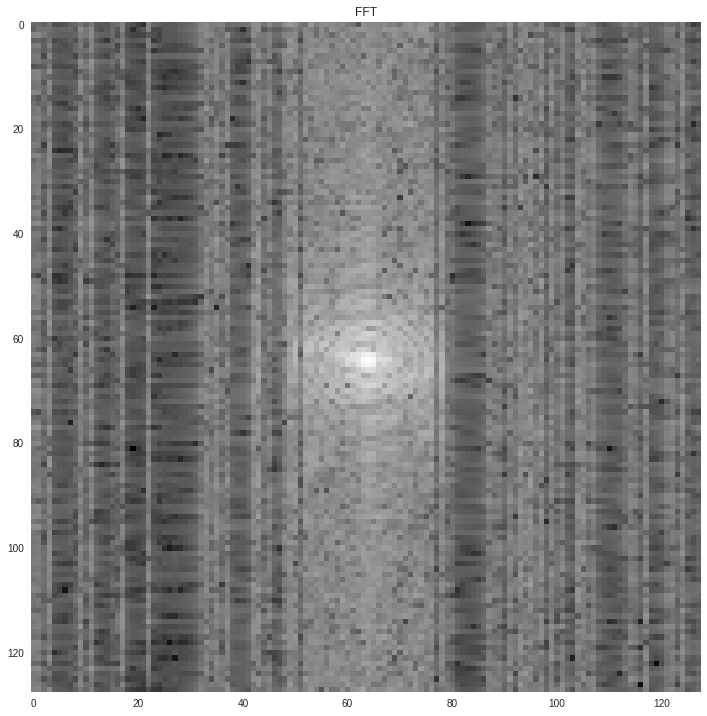

In [17]:
plt.title('FFT')
utils.plot.imshowfft(x)

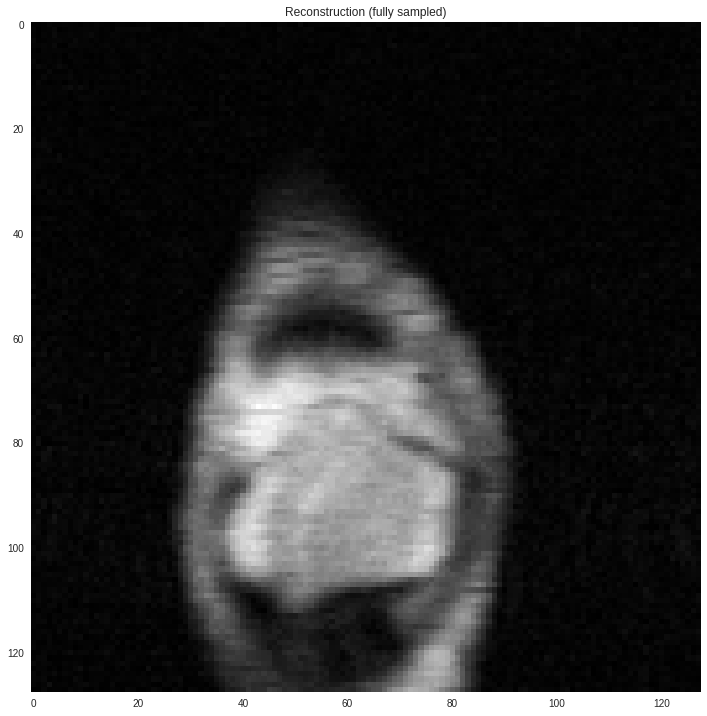

In [18]:
plt.title('Reconstruction')
utils.plot.imshowgray(y)

# Inspect train data

In [27]:
# Load data

data_locations = os.path.join(train_tfrecord_directory, 'shard-0.tfrecord')
dataset = utils.fastmri.load_dataset(data_locations,
                                     batch_size=8,
                                     shuffle_buffer_size=40,
                                     load_original_reconstruction=False,
                                     include_all_parsed_features=False,
                                     ignore_errors=True,
                                     perform_data_augmentation=False)

# Get first batch
batch = next(iter(dataset))
x, y = batch
x, y = x[0].numpy().squeeze(), y[0].numpy().squeeze()


# For visualization, combine 2 channels of complex tensor into single channel
x = utils.fastmri._combine_two_channels_of_complex_tensor(x).numpy()

x.shape, y.shape

Loading dataset... Shuffle items? True. Shuffle buffer: 40


((128, 128), (128, 128))

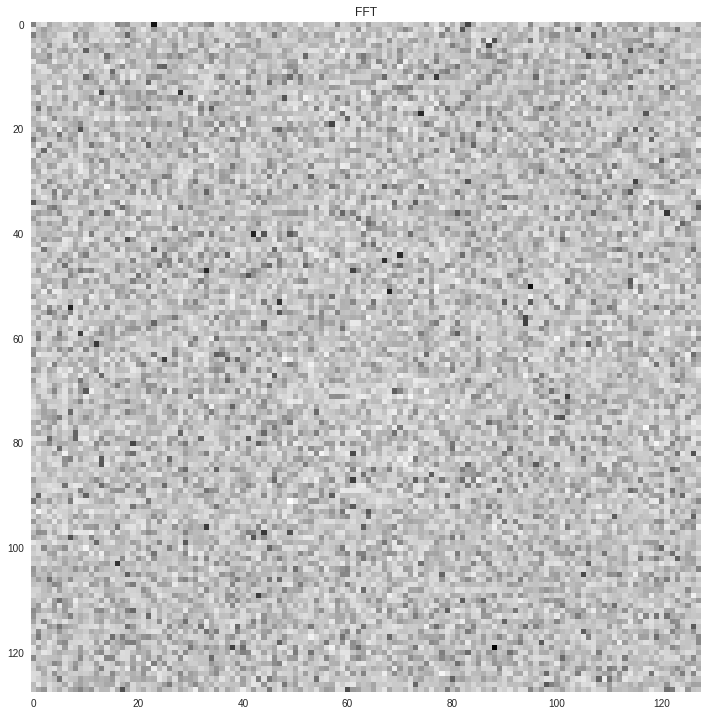

In [28]:
plt.title('FFT')
utils.plot.imshowfft(x)

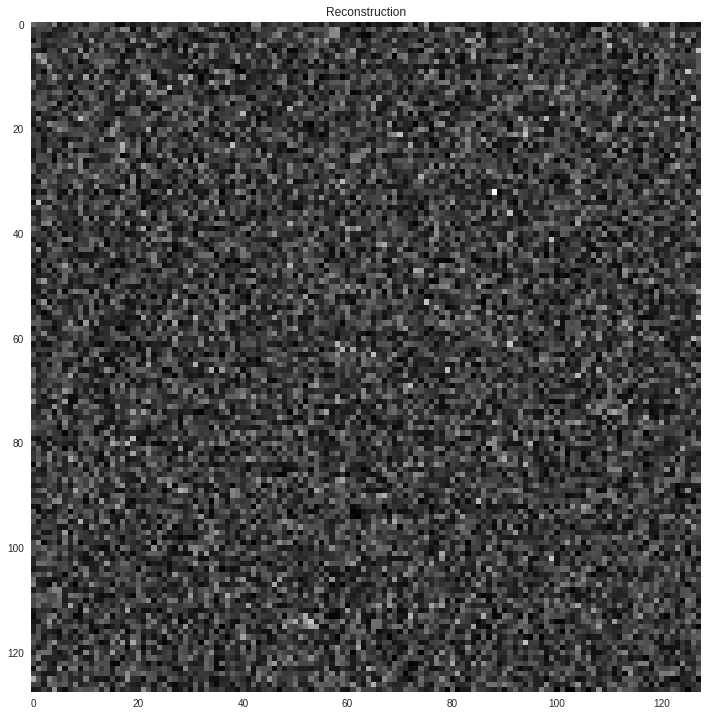

In [29]:
plt.title('Reconstruction')
utils.plot.imshowgray(y)